In [1]:
options(jupyter.plot_mimetypes = 'image/png')
options(repr.plot.width=5.0, repr.plot.height=4.0, repr.plot.res=300)

In [2]:
library(ggplot2)
library(ggthemes)

In [3]:
df <- read.csv("../data/weartime_by_country_20170508.csv") 

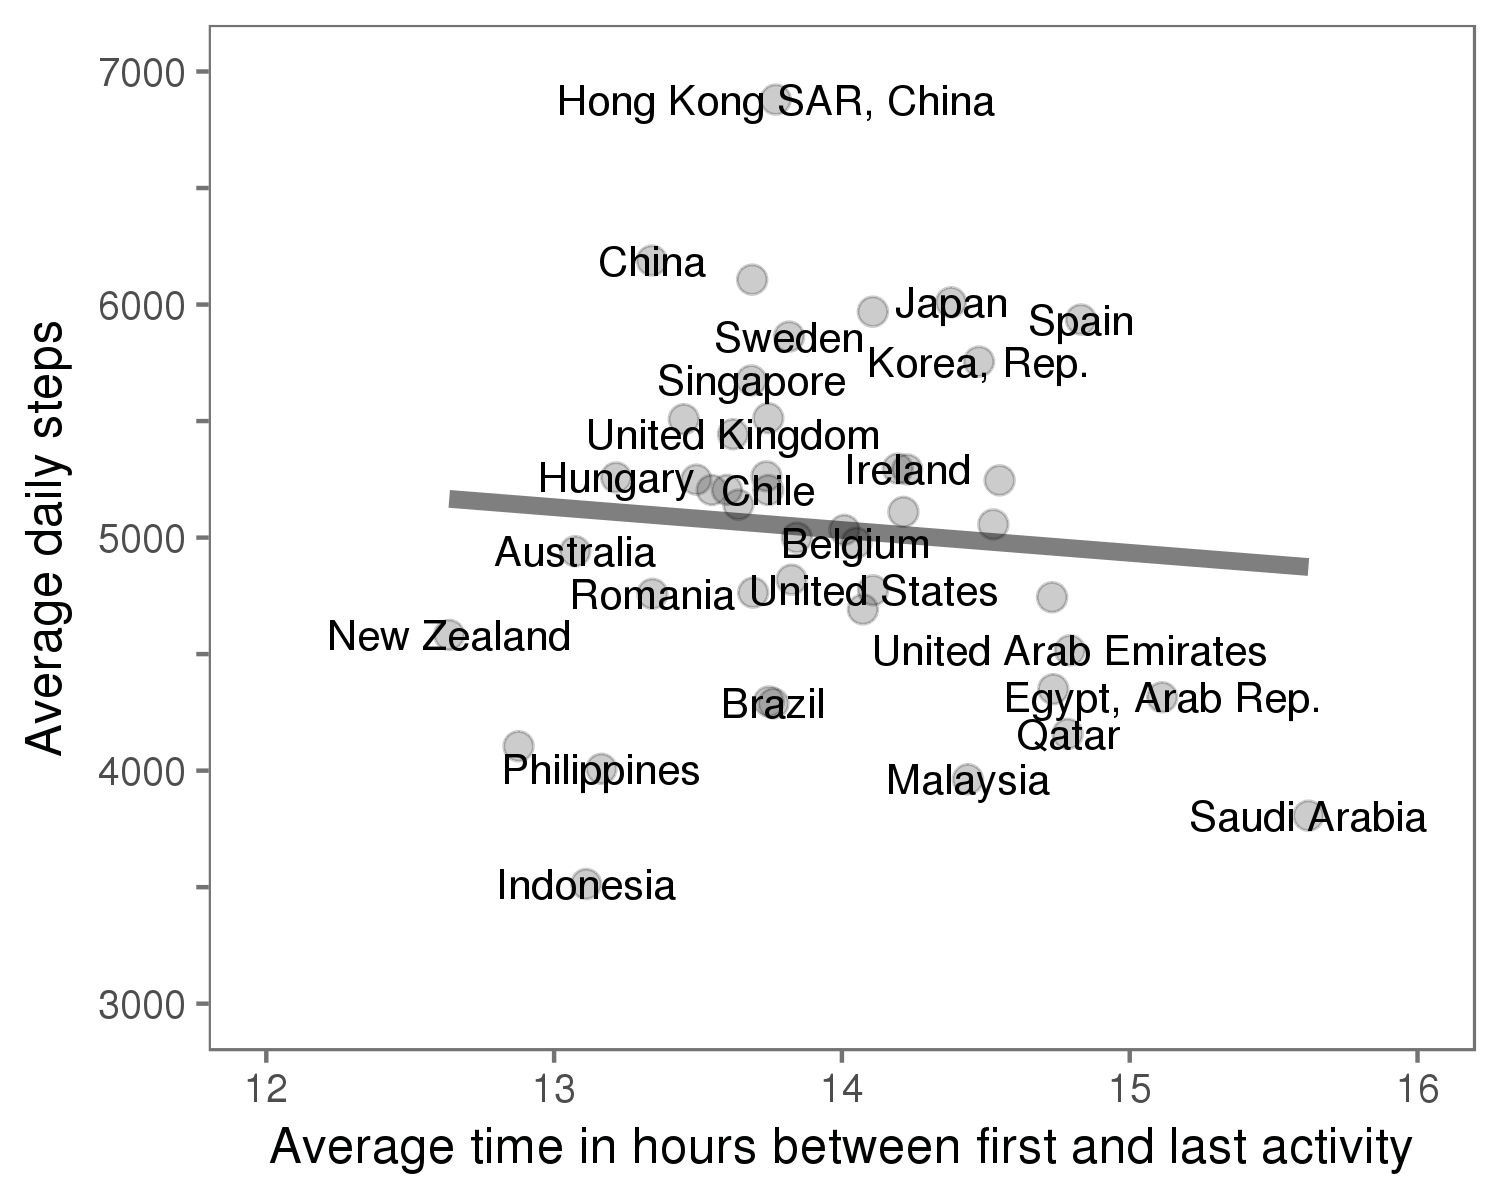

In [4]:
p <- ggplot(df, aes(weartime_mean, steps_mean, label=country))
p <- p + geom_smooth(method="lm", color="gray50", alpha=1.0,  se = F, size=2.0)
p <- p + geom_point(alpha=.2, size=3.0)
p <- p + geom_text(check_overlap = T, size=3.5)
p <- p + ylab("Average daily steps") + xlab("Average time in hours between first and last activity")
p <- p + guides(color=FALSE) + guides(size=FALSE)
p <- p + theme_few(base_size=12, base_family="Helvetica")
p <- p + scale_colour_brewer(palette = "Set2")

# xticks
ticks = seq(12,16,by=1) 
labels = rep("", length(ticks))
labels[seq(1, length(labels), 1)] = sprintf("%.0f", ticks[seq(1, length(labels), 1)])
p <- p + scale_x_continuous(breaks=ticks, labels=labels, limits=c(12, 16))
# yticks
ticks = seq(3000,7000,by=500) 
labels = rep("", length(ticks))
labels[seq(1, length(labels), 2)] = sprintf("%.0f", ticks[seq(1, length(labels), 2)])
p <- p + scale_y_continuous(breaks=ticks, labels=labels, limits=c(3000,7000))
p

ggsave(filename="../output/edfig9.pdf", plot=p, width=5, height=3)

On a country level, there is no significant association between wear time and daily steps (r=-0.086, p = 0.57).

In [5]:
cor.test(df$weartime_mean, df$steps_mean)


	Pearson's product-moment correlation

data:  df$weartime_mean and df$steps_mean
t = -0.57292, df = 44, p-value = 0.5696
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3671763  0.2094805
sample estimates:
        cor 
-0.08605047 
